In [78]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [79]:
df = pd.read_csv('car_prices.csv')
df = df.drop(columns = ['saledate', 'model', 'trim', 'vin', 'seller'])
df = df.rename(columns={'mmr': 'estimated_value'})
df = df[df['odometer'] <= 700000]
df = df.replace('—', np.nan)
df = df.dropna()
df.head(5)

,year,make,body,transmission,state,condition,odometer,color,interior,estimated_value,sellingprice
0,2015,Kia,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0
4,2014,BMW,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0


In [80]:
for col in df.columns:
    print(f"--- {col} ---")
    if df[col].dtype == 'object':
        print(f"Unique values: {df[col].unique()}")
        print(f"Number of unique values: {df[col].nunique()}")
    else:
        print(f"Min: {df[col].min()}, Max: {df[col].max()}")
        print(f"Mean: {df[col].mean()}, Median: {df[col].median()}")
    print("\n")

--- year ---
Min: 1990, Max: 2015
Mean: 2010.136749749661, Median: 2012.0


--- make ---
Unique values: ['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Cadillac' 'Acura'
 'Lexus' 'Hyundai' 'Buick' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' 'Dodge' 'FIAT' 'Chrysler' 'Ferrari' 'Honda'
 'GMC' 'Ram' 'smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'Saab' 'Suzuki' 'Oldsmobile' 'Rolls-Royce' 'Isuzu' 'Tesla'
 'Aston Martin' 'Geo' 'Plymouth' 'Fisker' 'Daewoo' 'Lamborghini' 'Lotus']
Number of unique values: 53


--- body ---
Unique values: ['SUV' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Crew Cab'
 'G Coupe' 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Minivan' 'Van'
 'Double Cab' 'King Cab' 'CTS Coupe' 'SuperCrew' 'E-Series Van'
 'Extended Cab' 'SuperCab' 'G Convertible' 'Koup' 'Regular Cab' 'Quad Cab'
 'CrewMax Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible' 'A

In [81]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 440403 entries, 0 to 558836
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             440403 non-null  int64  
 1   make             440403 non-null  object 
 2   body             440403 non-null  object 
 3   transmission     440403 non-null  object 
 4   state            440403 non-null  object 
 5   condition        440403 non-null  float64
 6   odometer         440403 non-null  float64
 7   color            440403 non-null  object 
 8   interior         440403 non-null  object 
 9   estimated_value  440403 non-null  float64
 10  sellingprice     440403 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 40.3+ MB


(440403, 11)

In [82]:
for col in df.columns:
    print(col)
    print(df[col].unique())

year
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1996 1995 1997 1994 1993 1992 1991 1990]
make
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Cadillac' 'Acura'
 'Lexus' 'Hyundai' 'Buick' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' 'Dodge' 'FIAT' 'Chrysler' 'Ferrari' 'Honda'
 'GMC' 'Ram' 'smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'Saab' 'Suzuki' 'Oldsmobile' 'Rolls-Royce' 'Isuzu' 'Tesla'
 'Aston Martin' 'Geo' 'Plymouth' 'Fisker' 'Daewoo' 'Lamborghini' 'Lotus']
body
['SUV' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Crew Cab'
 'G Coupe' 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Minivan' 'Van'
 'Double Cab' 'King Cab' 'CTS Coupe' 'SuperCrew' 'E-Series Van'
 'Extended Cab' 'SuperCab' 'G Convertible' 'Koup' 'Regular Cab' 'Quad Cab'
 'CrewMax Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible' 'Access Cab'
 'C

In [83]:
keywords = {
    'van': 'Van',
    'minivan': 'Minivan',
    'suv': 'SUV',
    'sedan': 'Sedan',
    'convertible': 'Convertible',
    'coupe': 'Coupe',
    'wagon': 'Wagon',
    'hatchback': 'Hatchback',
    'cab': 'Pickup'
}

simplified = []
for val in df['body']:
    val_lower = str(val).lower()
    matched = False
    for keyword, category in keywords.items():
        if keyword in val_lower:
            simplified.append(category)
            matched = True
            break
    if not matched:
        simplified.append('Other')

df['body_simplified'] = simplified
df = df.drop(columns = 'body')

In [84]:
print(df['body_simplified'].unique())
df['body_simplified'].value_counts()
df.head(5)

['SUV' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Pickup' 'Van'
 'Other']


,year,make,transmission,state,condition,odometer,color,interior,estimated_value,sellingprice,body_simplified
0,2015,Kia,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0,SUV
1,2015,Kia,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0,SUV
2,2014,BMW,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0,Sedan
3,2015,Volvo,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0,Sedan
4,2014,BMW,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0,Sedan


In [85]:
temp = [c for c in df.columns if c != 'sellingprice']
temp.append('sellingprice')
df = df[temp]

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


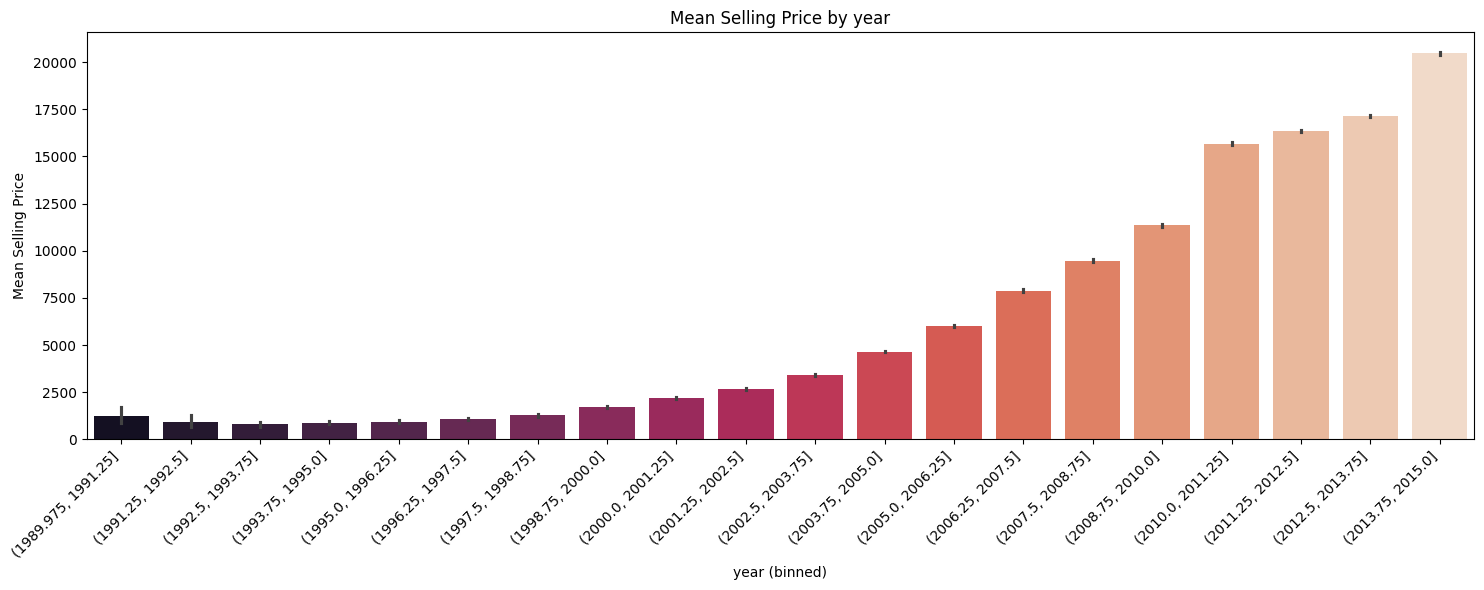

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


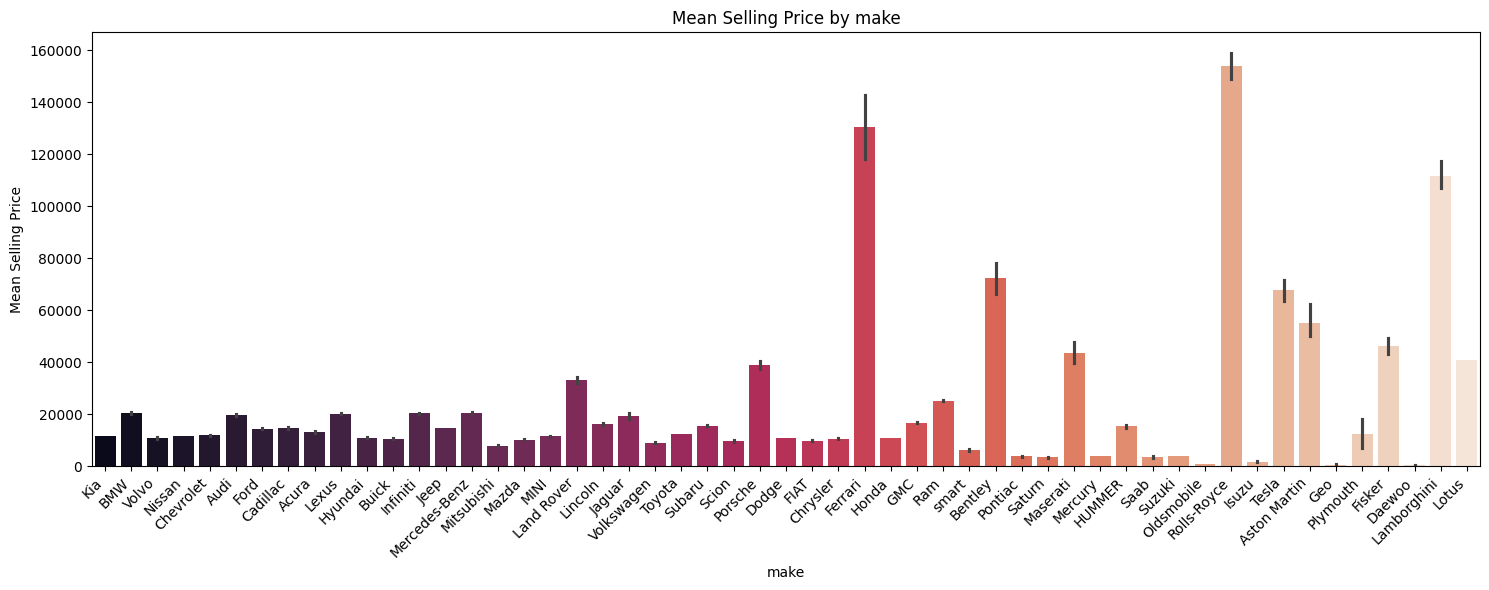

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


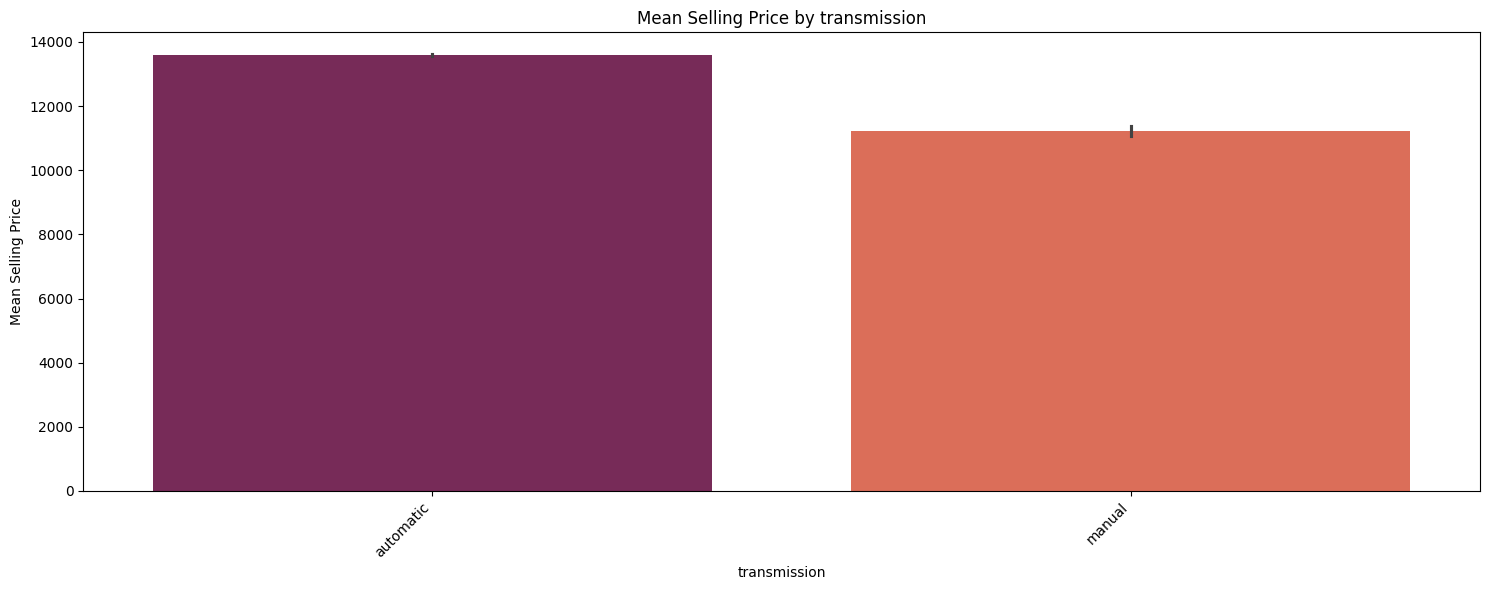

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


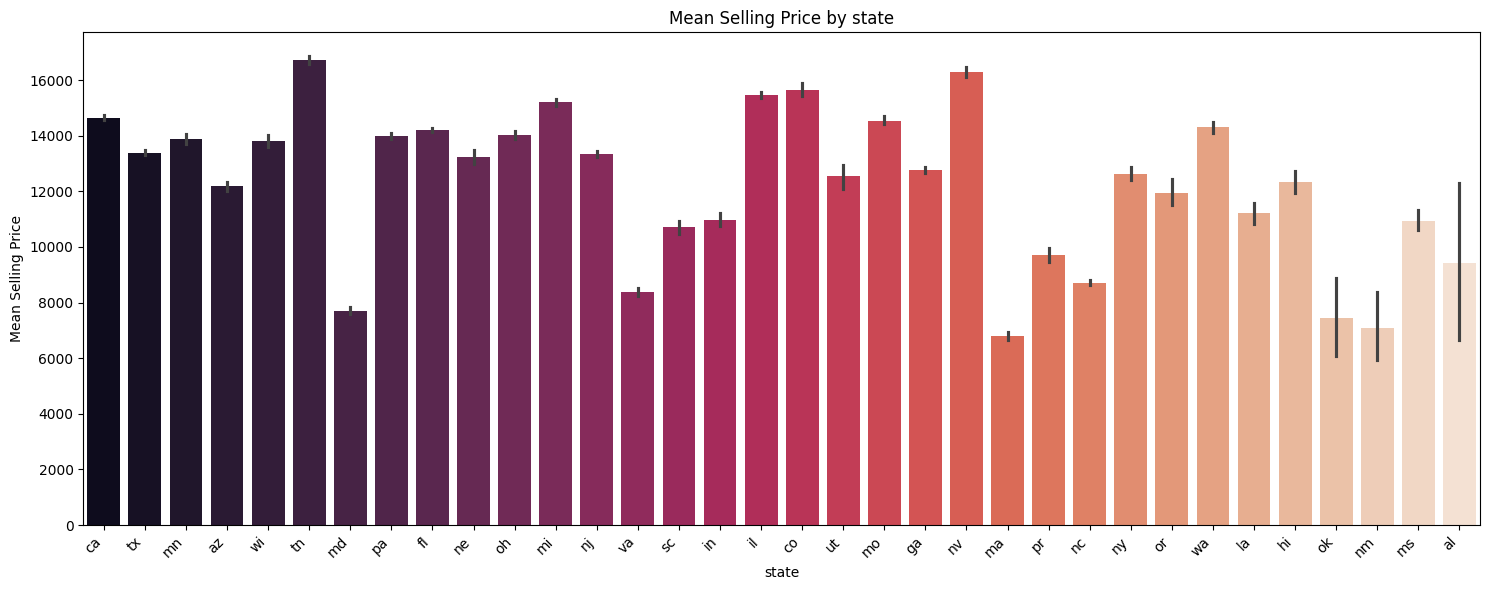

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


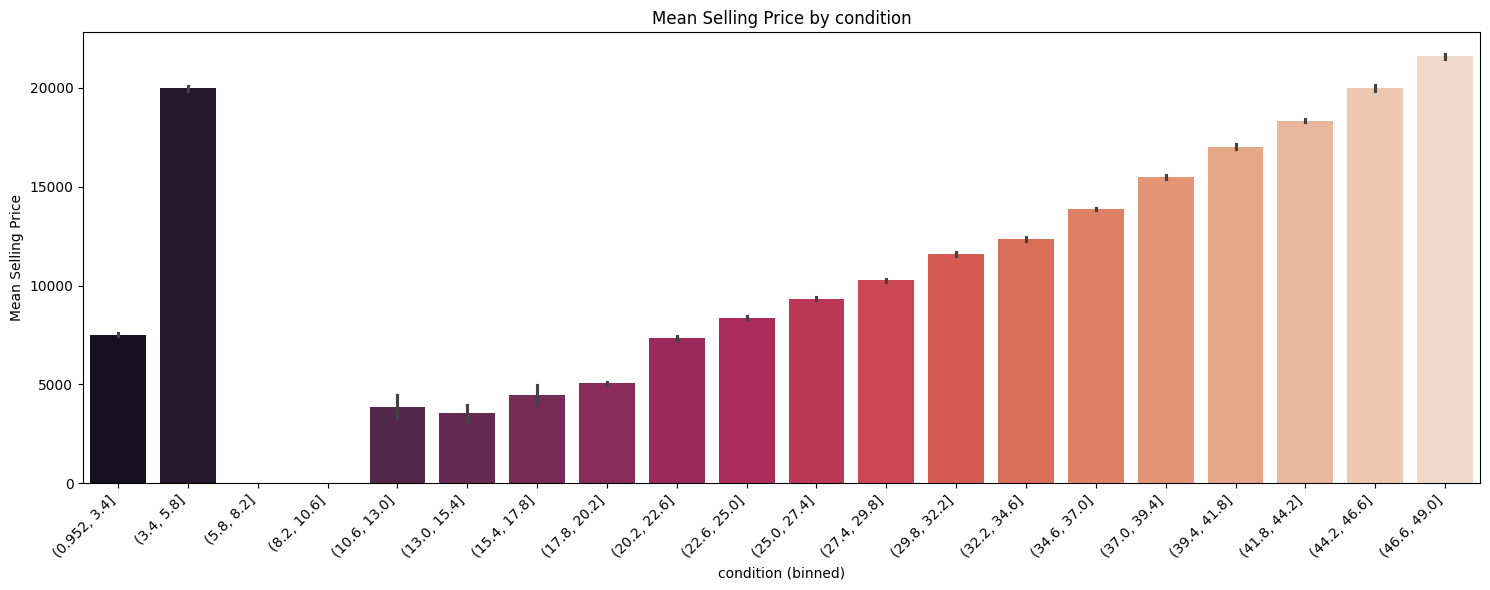

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


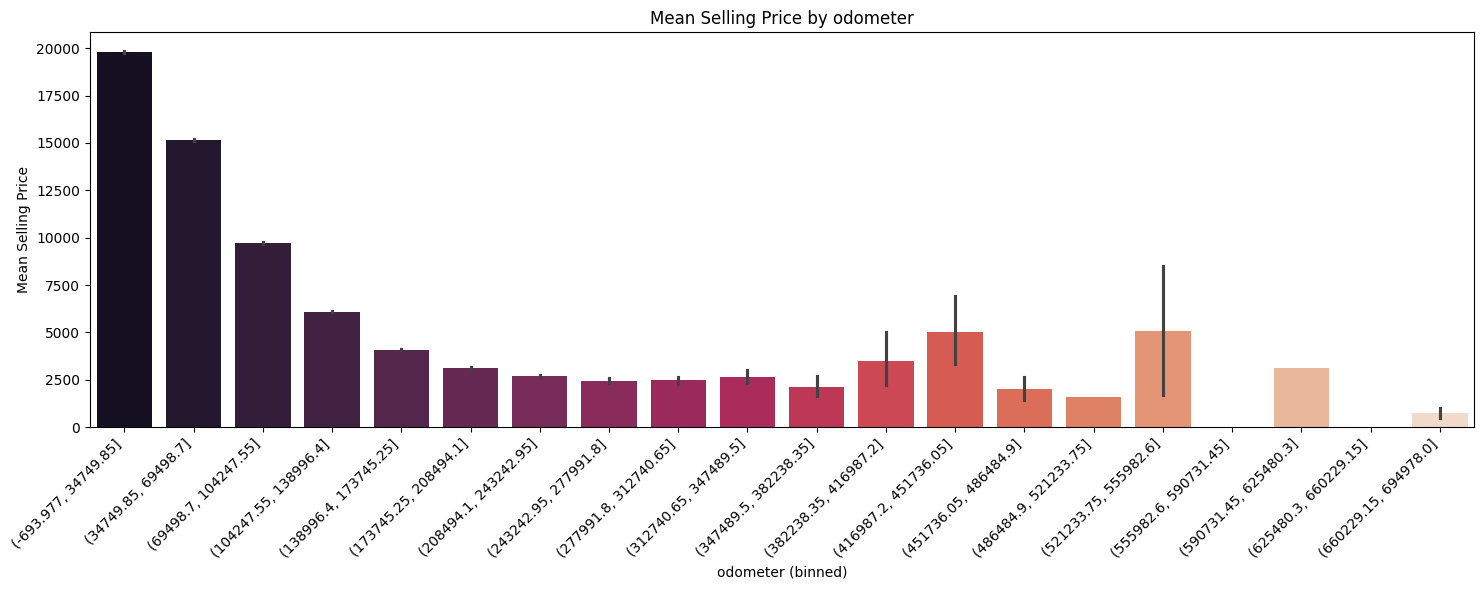

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


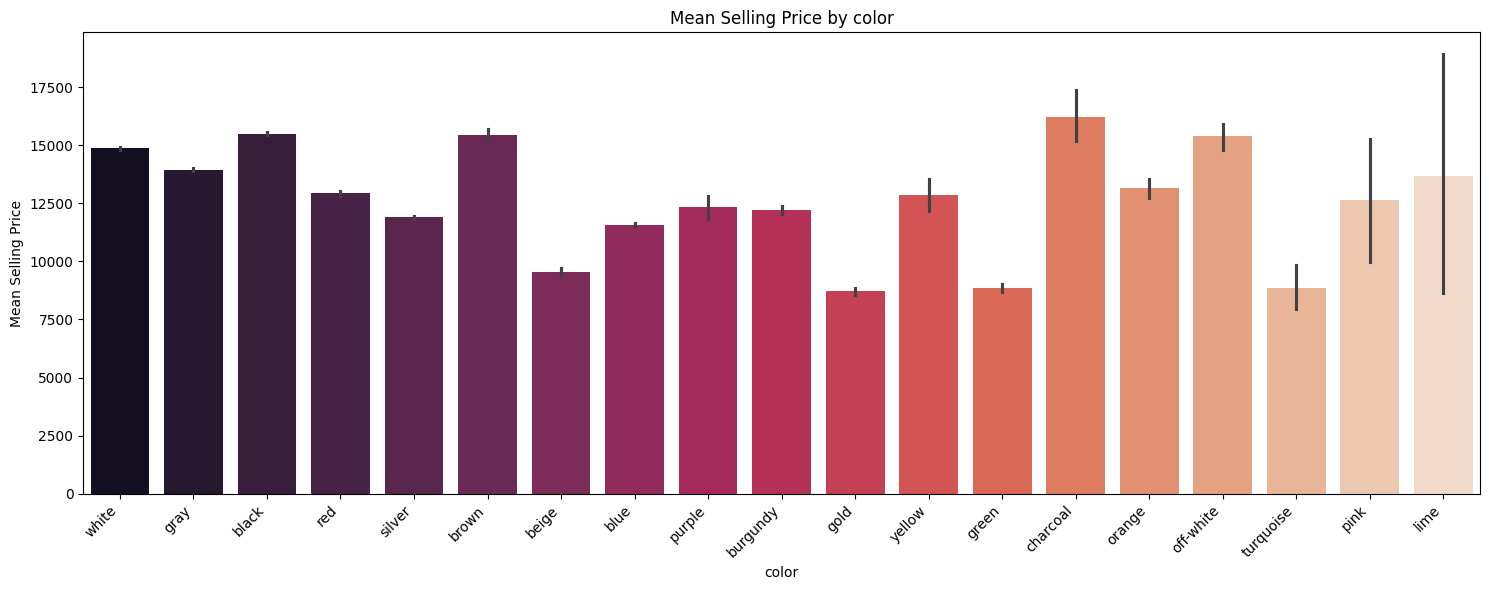

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


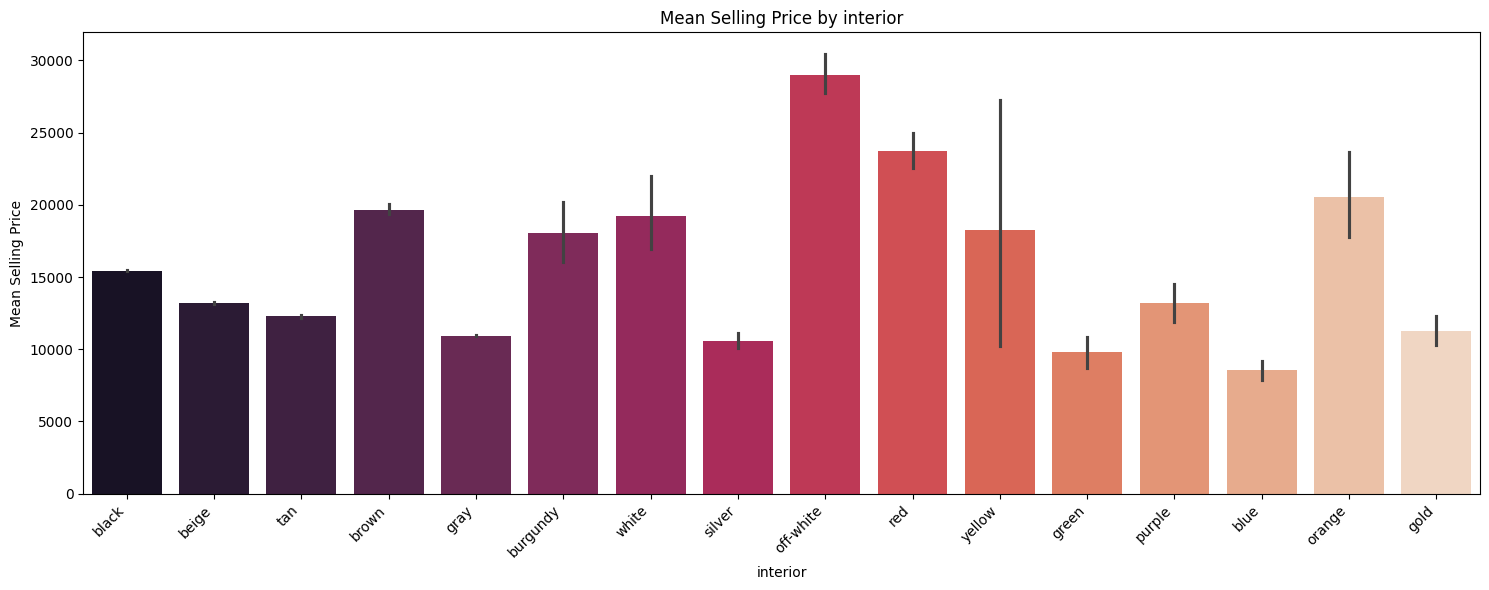

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


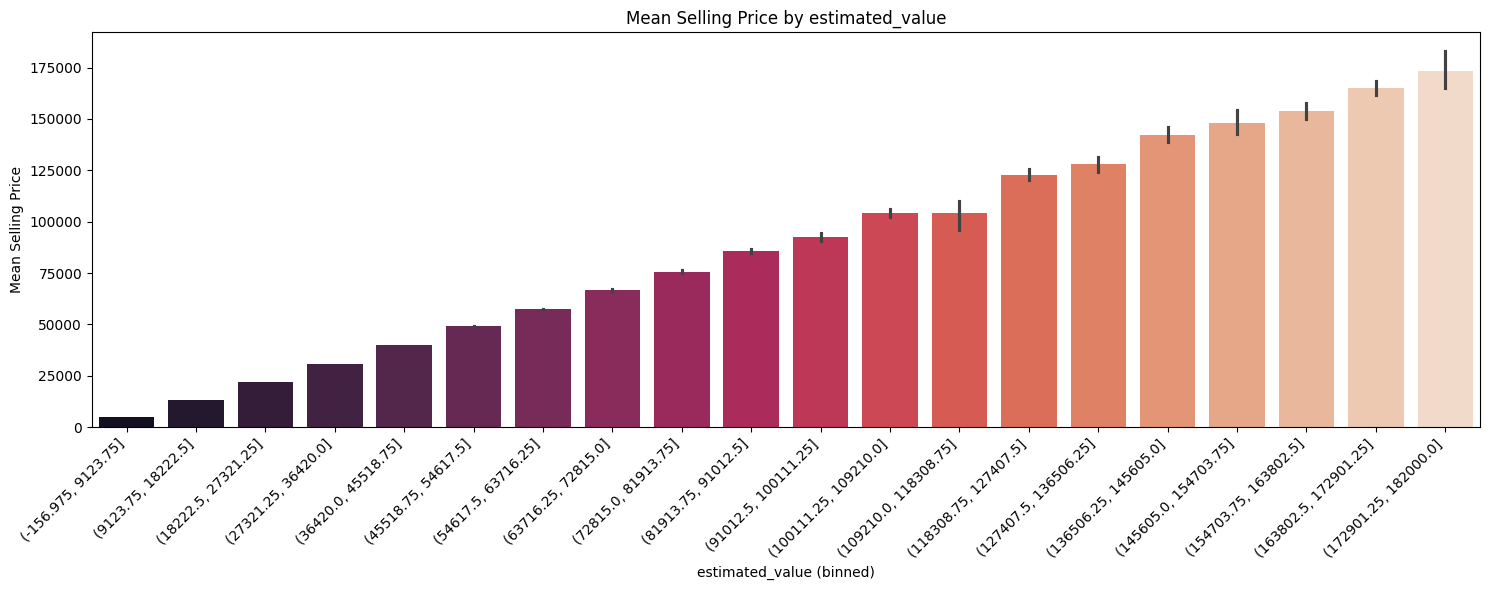

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


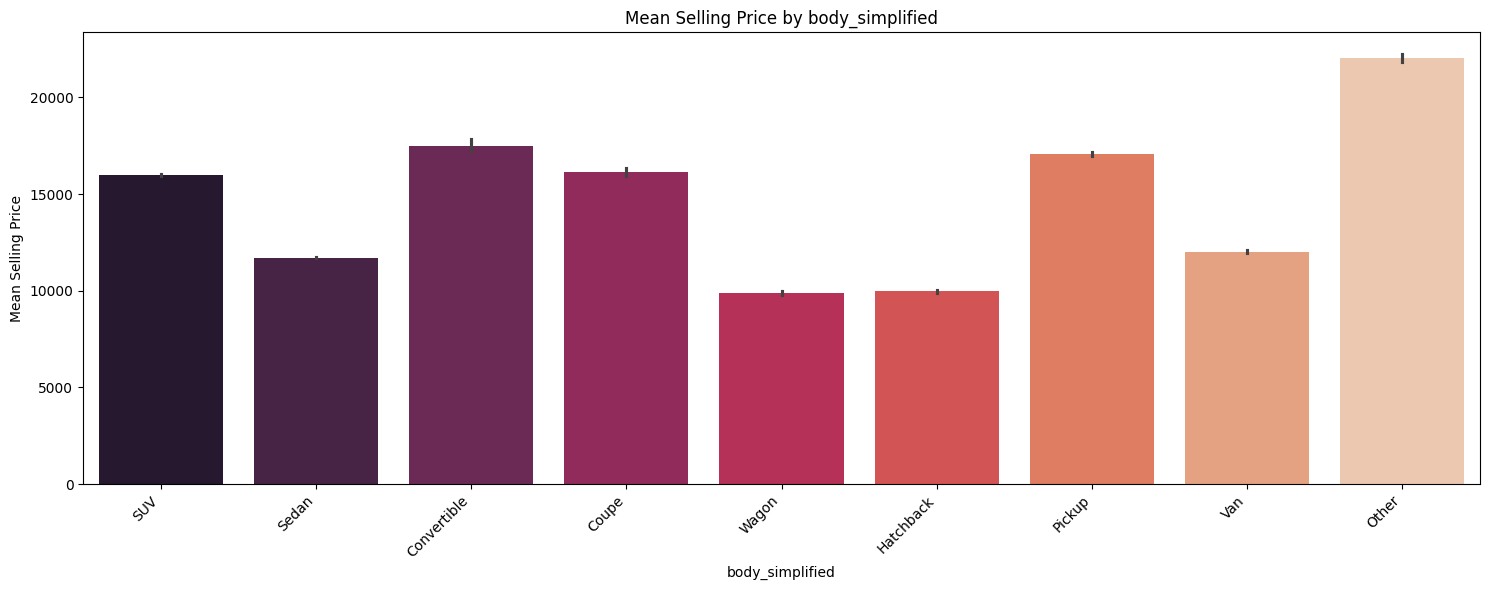

/var/folders/v7/88ry0pbd04z0ttww_fq99rg80000gn/T/ipykernel_51664/3314396644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


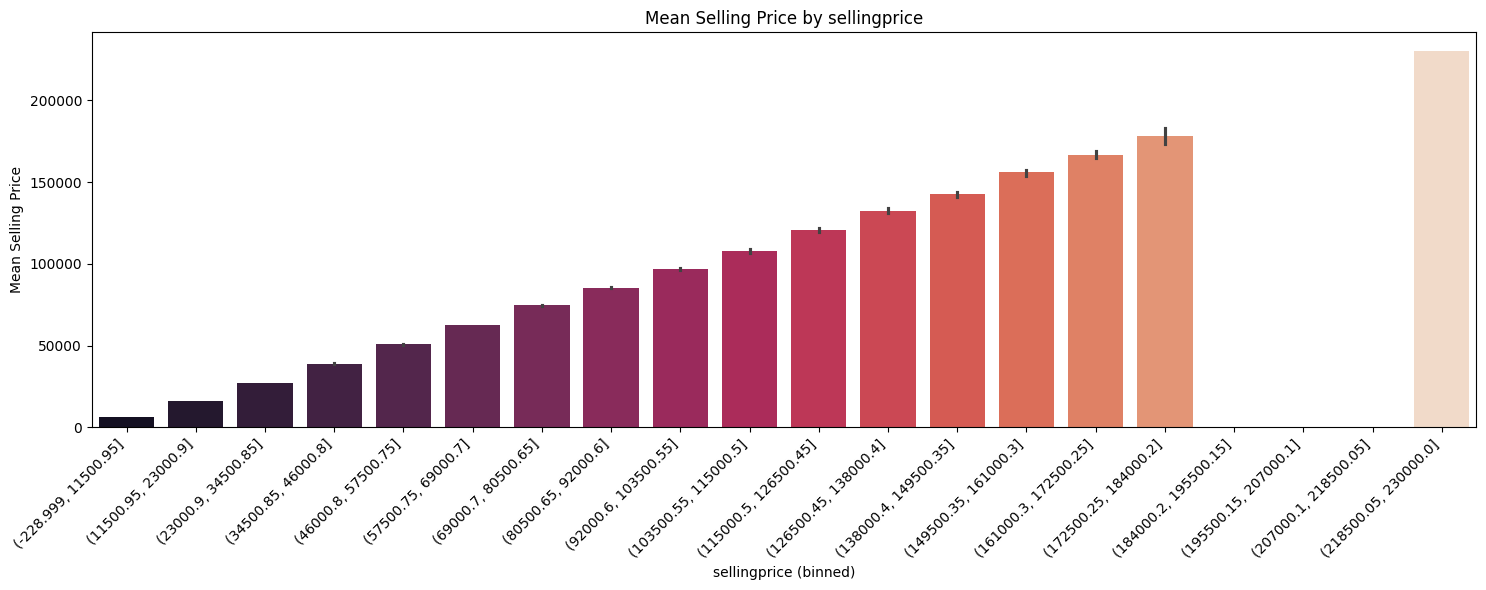

In [86]:
df_plot = df.copy()
df_plot.drop('sellingprice', axis = 1)

for col in df_plot.columns: 
    plt.figure(figsize=(15,6))
    if pd.api.types.is_numeric_dtype(df[col]):
        df_plot[f'{col}_bin'] = pd.cut(df_plot[col], bins=20)
        sns.barplot(
            x = f'{col}_bin',
            y = 'sellingprice',
            data = df_plot,
            estimator = 'mean',
            palette='rocket'
        )
        plt.xlabel(f'{col} (binned)')
    else:
        sns.barplot(
            x = col,
            y = 'sellingprice',
            data = df_plot,
            estimator = 'mean',
            palette='rocket'
        )
        plt.xlabel(col)
    
    plt.ylabel("Mean Selling Price")
    plt.xticks(rotation = 45, ha = 'right')
    plt.title(f"Mean Selling Price by {col}")
    plt.tight_layout()
    plt.show()

In [88]:
X = df.drop(columns=['sellingprice', 'estimated_value'])
y = df['sellingprice']

# One-hot encode categorical columns if needed
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [89]:
log_reg = LinearRegression()
log_reg.fit(X_train, y_train)

log_reg_y = log_reg.predict(X_test)
print(log_reg_y)

print("Linear Regression RMSE")
print(root_mean_squared_error(y_test, log_reg_y))
print("Linear Regression R^2:")
print(r2_score(y_test, log_reg_y))

[ 9618.86781606 11722.58414736 18221.65427294 ... 17990.09150655
 28513.03975312 -4323.95741164]
Linear Regression RMSE
5443.388550243133
Linear Regression R^2:
0.6818648158424245


In [90]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_y = random_forest.predict(X_test)

In [ ]:
print("Random Forest RMSE")
print(root_mean_squared_error(y_test, random_forest_y))
print("Random Forest R^2:")
print(r2_score(y_test, random_forest_y))

importances = pd.Series(random_forest.feature_importances_, index=X.columns)
agg_importances = {}

#used chatgpt to help sort through categorical columns
for col in importances.index:
    feature_name = col.split('_')[0]
    agg_importances[feature_name] = agg_importances.get(feature_name, 0) + importances[col]

agg_importances = pd.Series(agg_importances).sort_values(ascending=False)
print(agg_importances)

Random Forest RMSE
3956.3007099493093
Random Forest R^2:
0.831944929808081
odometer        0.407009
make            0.227538
body            0.124598
year            0.102823
condition       0.046594
state           0.042194
color           0.024956
interior        0.021544
transmission    0.002744
dtype: float64


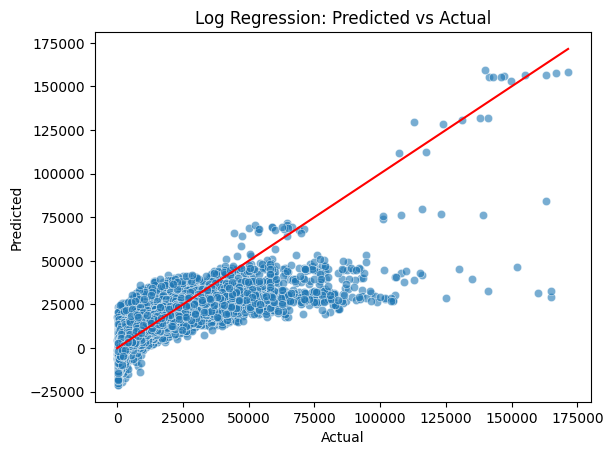

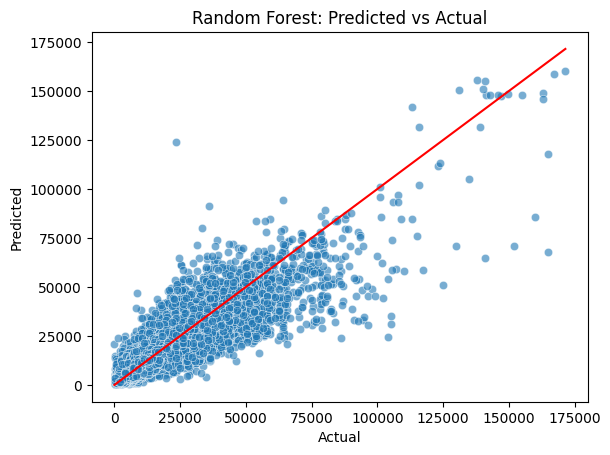

In [97]:
sns.scatterplot(x=y_test, y=log_reg_y, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Log Regression: Predicted vs Actual")
plt.show()

sns.scatterplot(x=y_test, y=random_forest_y, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Predicted vs Actual")
plt.show()
